In [1]:
#importing the necessary libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split 


In [11]:
#data collection
data=pd.read_csv('gld_price_data.csv')
print(data.head())
print(data.dtypes)

       Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099
Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object


In [13]:
#deriving the statistics from the dataset 
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB
None
               SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297
75%    2073.010070   132.840004   

In [15]:
#finding whether are there any missing values 
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [17]:
#as the data is free from null values we need to check duplicates 
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2285    False
2286    False
2287    False
2288    False
2289    False
Length: 2290, dtype: bool

In [19]:
# Its is good that the data is also free from any duplicates

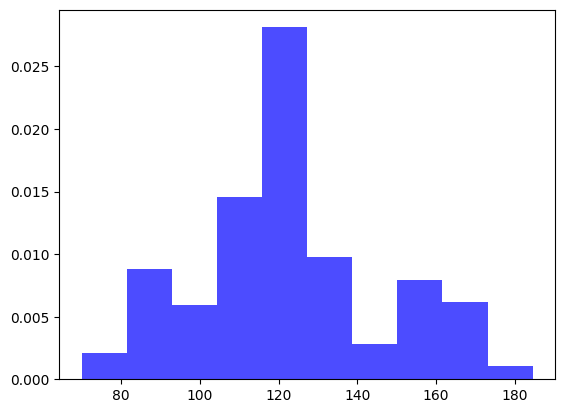

In [27]:
#some plots 
plt.hist(data['GLD'],density=True,color='b',alpha=0.7)
plt.show()

In [29]:
#most of the prices fluctuate between the 100-140 

In [31]:
# Splitting the features and target
X=data.drop(['GLD','Date'],axis=1)
Y=data['GLD']
print(X.shape,Y.shape)

(2290, 4) (2290,)


In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [35]:
#model training 
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.9900245384549384

In [37]:
#checking the accuracy
Y_pred=model.predict(X_test)
accuracy=r2_score(Y_test,Y_pred)
print(f"The R2 score is {accuracy}")

The R2 score is 0.9900245384549384
